### Notebook exploring how to create patches in PyTorch
#### Focused on an example image

In [2]:
import matplotlib.pyplot as plt
from openslide import open_slide
import numpy as np
from PIL import Image
import os
import torch
from torchvision import io, transforms
from torchvision.utils import Image, ImageDraw
from torchvision.transforms.functional import to_pil_image

Image.MAX_IMAGE_PIXELS = None

In [2]:
# Read in example WSI
SVS_DIR='/Users/alexandrasmith/Desktop/Workspace/Projects/masters/data/raw/svs_files/'
svs_files = os.listdir(SVS_DIR)
svs_file = SVS_DIR + svs_files[1]
slide = open_slide(svs_file)
FILE_NAME=svs_file.replace('.svs', '').replace(SVS_DIR, '')

In [3]:
# Get 10X thumbnail of slide to work with
slide_props = slide.properties
slide_width = int(slide_props['openslide.level[1].width']); slide_height = int(slide_props['openslide.level[1].height'])
slide10X = np.array(slide.get_thumbnail(size=(slide_width, slide_height)))

In [8]:
# Read in example labelled image
MASK_DIR='/Users/alexandrasmith/Desktop/Workspace/Projects/masters/data/interim/masks/'
mask_file = MASK_DIR + FILE_NAME + '.png'
mask = np.array(Image.open(mask_file))
# reshape mask file to be same size as SVS
mask = mask[:slide10X.shape[0], :slide10X.shape[1]]

In [9]:
# Check they are the same shapes
print(slide_width, slide_height)
print(slide10X.shape)
print(len(mask.shape))
print(mask.shape) # height, width ?

17954 20401
(20401, 17954, 3)
2
(20401, 17954)


Text(0.5, 1.0, 'Segmentation mask')

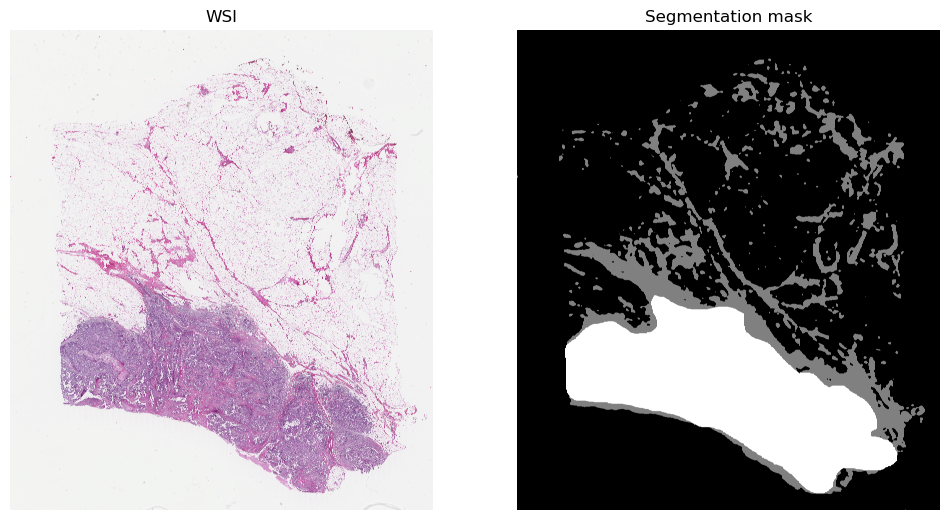

In [37]:
# Visually confirm that we are working with corresponding images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(slide10X); ax1.axis('off'); ax1.set_title("WSI")
ax2.imshow(mask, cmap="gray"); ax2.axis('off'); ax2.set_title("Segmentation mask")

## Testing my functions

In [7]:
import sys
sys.path.append('/Users/alexandrasmith/Desktop/Workspace/Projects/masters/src/')
from data.preprocessing import *

In [4]:
PATCH_SIZE=5000
STRIDE=PATCH_SIZE

In [19]:
print(slide10X.shape)

(23395, 33557, 3)


In [11]:
im_patches = image_to_patches(slide10X, PATCH_SIZE, STRIDE)

NameError: name 'PATCH_SIZE' is not defined

In [13]:
print(im_patches.shape)

torch.Size([12, 3, 5000, 5000])


In [69]:
first_patch = im_patches[0, :, :, :]
print(first_patch.shape)

i = 6
ith_patch = im_patches[i, :, :, :]

torch.Size([3, 5000, 5000])


In [70]:
p1 = first_patch.numpy()
p2 = ith_patch.numpy()

In [71]:
print(np.average(p1)*255)
print(np.average(p2)*255)

241.96978479623795
217.16305911540985


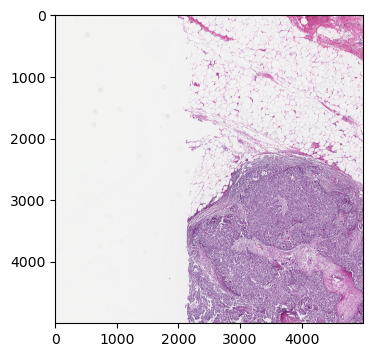

In [72]:
# View patch
plt.figure(figsize=(4, 4))
plt.imshow(np.transpose(ith_patch.numpy(), (1, 2, 0)))

In [8]:
mask_patches = image_to_patches(mask, PATCH_SIZE, STRIDE)

print(mask_patches.shape)

torch.Size([24, 5000, 5000])


In [8]:
first_m_patch = mask_patches[0, :, :]
print(first_m_patch.shape)

i = 3
ith_m_patch = mask_patches[i, :, :]

torch.Size([5000, 5000])


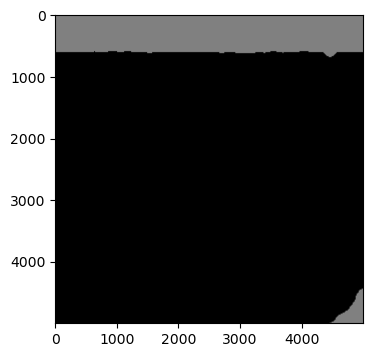

In [29]:
# View patch
plt.figure(figsize=(4, 4))
plt.imshow(first_m_patch.numpy(), cmap="gray", vmin=0, vmax=1)

In [11]:
# Troubleshooting the function for binary images
unique_values, unique_indices = torch.unique(first_m_patch, return_inverse=True)
print("Unique values:", unique_values)
print("Number of unique values:", len(unique_values))

Unique values: tensor([0.0000, 0.5000])
Number of unique values: 2


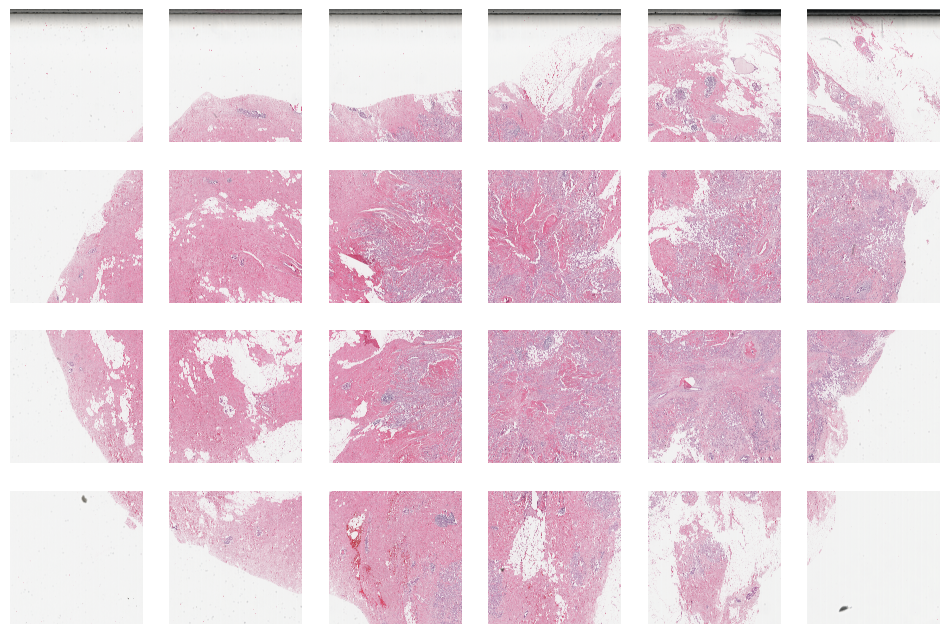

In [27]:
fig, axes = plt.subplots(4, 6, figsize=(12, 8))
axs = axes.ravel()
for i, ax in enumerate(axs):
    ax.imshow(np.transpose(im_patches[i, :, :, :].numpy(), (1, 2, 0)))
    ax.axis('off')

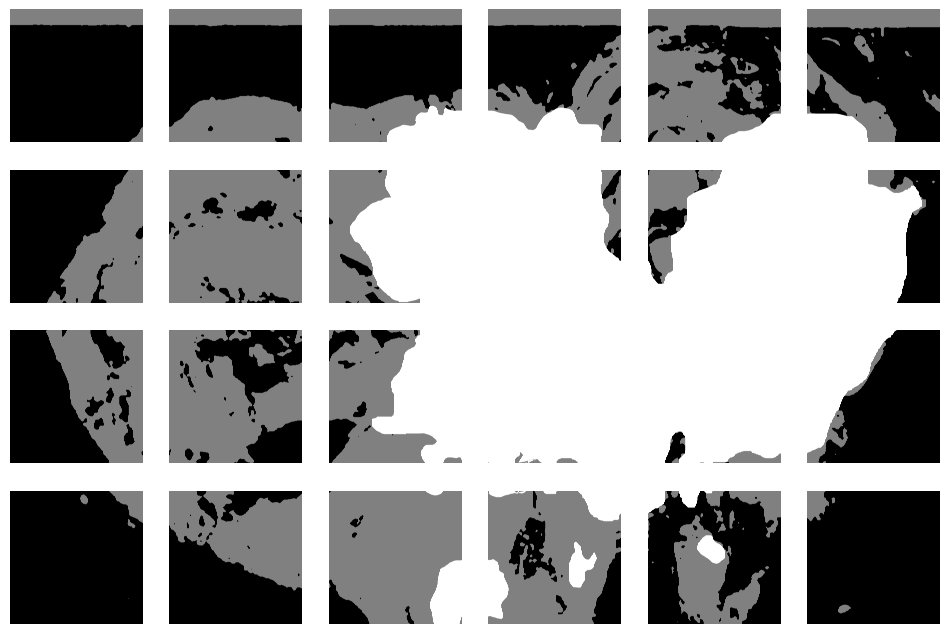

In [9]:
fig, axes = plt.subplots(4, 6, figsize=(12, 8))
axs = axes.ravel()
for i, ax in enumerate(axs):
    ax.imshow(mask_patches[i, :, :].numpy(), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

In [9]:
# Testing 'discard' function
tissue_patches, seg_patches = discard_background_patches(im_patches, mask_patches, PATCH_SIZE)

In [10]:
print(tissue_patches.shape)
print(seg_patches.shape) # should have same number of patches

torch.Size([21, 3, 5000, 5000])
torch.Size([21, 5000, 5000])


IndexError: index 21 is out of bounds for dimension 0 with size 21

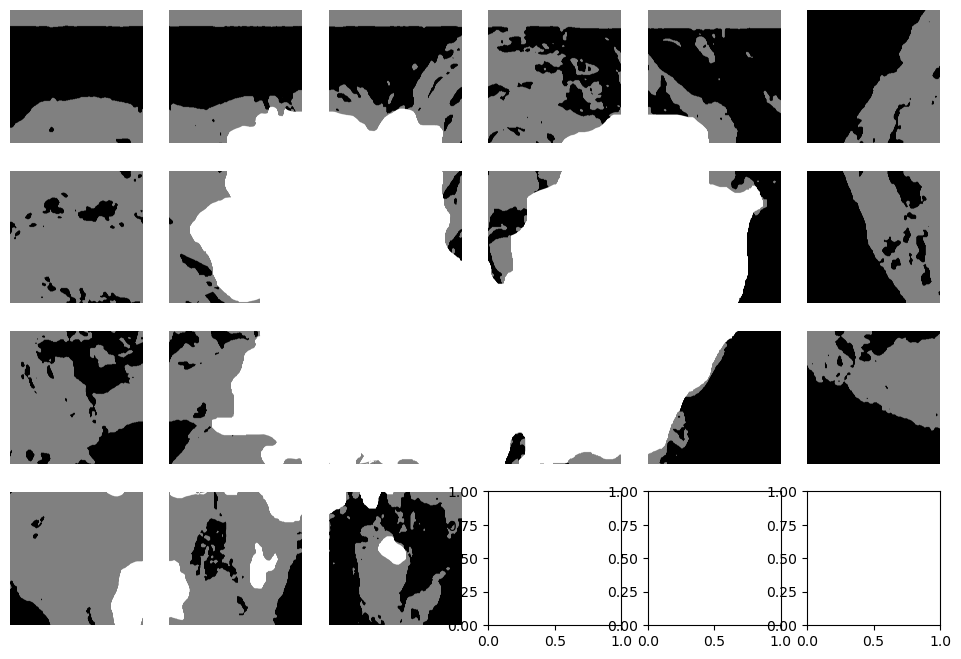

In [11]:
# Visualise the patches that were kept
fig, axes = plt.subplots(4, 6, figsize=(12, 8))
axs = axes.ravel()
for i, ax in enumerate(axs):
    ax.imshow(seg_patches[i, :, :].numpy(), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

In [3]:
# Test load_data() function

PATCH_SIZE=5000
STRIDE=PATCH_SIZE
SVS_DIR='/Users/alexandrasmith/Desktop/Workspace/Projects/masters/data/raw/svs_files/'
MASK_DIR='/Users/alexandrasmith/Desktop/Workspace/Projects/masters/data/interim/masks/'
NUM_CLASSES=2


In [4]:
patches, labels = load_data(SVS_DIR, MASK_DIR, PATCH_SIZE, STRIDE, NUM_CLASSES)

TCGA-A2-A0SY-01Z-00-DX1.279A5479-E183-4F79-AF40-50BF1834BA4A
Finished discarding background patches for file TCGA-A2-A0SY-01Z-00-DX1.279A5479-E183-4F79-AF40-50BF1834BA4A
Concatenated patches from file TCGA-A2-A0SY-01Z-00-DX1.279A5479-E183-4F79-AF40-50BF1834BA4A to list of all patches
TCGA-A2-A0CX-01Z-00-DX1.F07C75AB-E568-45CB-B497-37C712490393
Finished discarding background patches for file TCGA-A2-A0CX-01Z-00-DX1.F07C75AB-E568-45CB-B497-37C712490393
Concatenated patches from file TCGA-A2-A0CX-01Z-00-DX1.F07C75AB-E568-45CB-B497-37C712490393 to list of all patches
TCGA-C8-A12Q-01Z-00-DX1.CE74E5B7-FD30-4CBE-8716-ECCF2213AAC3
Finished discarding background patches for file TCGA-C8-A12Q-01Z-00-DX1.CE74E5B7-FD30-4CBE-8716-ECCF2213AAC3
Concatenated patches from file TCGA-C8-A12Q-01Z-00-DX1.CE74E5B7-FD30-4CBE-8716-ECCF2213AAC3 to list of all patches
TCGA-A2-A0SW-01Z-00-DX1.E1EA0407-B831-4D75-826E-80B82B821797
Finished discarding background patches for file TCGA-A2-A0SW-01Z-00-DX1.E1EA0407-B83

In [6]:
print(patches.shape)
print(len(labels))

torch.Size([86, 3, 5000, 5000])
86


In [12]:
print(type(labels))

<class 'torch.Tensor'>


In [11]:
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])


In [10]:
labels = torch.tensor(labels, dtype=torch.long)
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])


/var/folders/lj/23hp30kd6vg4nl2my4pt2dn80000gn/T/ipykernel_54070/366308947.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long)


### Read in example patches extracted and saved as .pt

In [2]:
PATCH_DIR='/Volumes/AlexS/MastersData/processed/patches/'
patches = os.listdir(PATCH_DIR)
file = PATCH_DIR + patches[0]

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/AlexS/MastersData/processed/patches/'

In [5]:
print(file)

/Volumes/AlexS/MastersData/processed/patches/TCGA-A8-A094-01Z-00-DX1.pt


In [6]:
pt0 = torch.load(file)

In [7]:
print(pt0.shape)

torch.Size([203, 3, 299, 299])


In [12]:
label_path = '/Volumes/AlexS/MastersData/processed/labels/' + patches[0]
print(label_path)

/Volumes/AlexS/MastersData/processed/labels/TCGA-A8-A094-01Z-00-DX1.pt


In [23]:
L = torch.load(label_path)

In [50]:
print(L)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


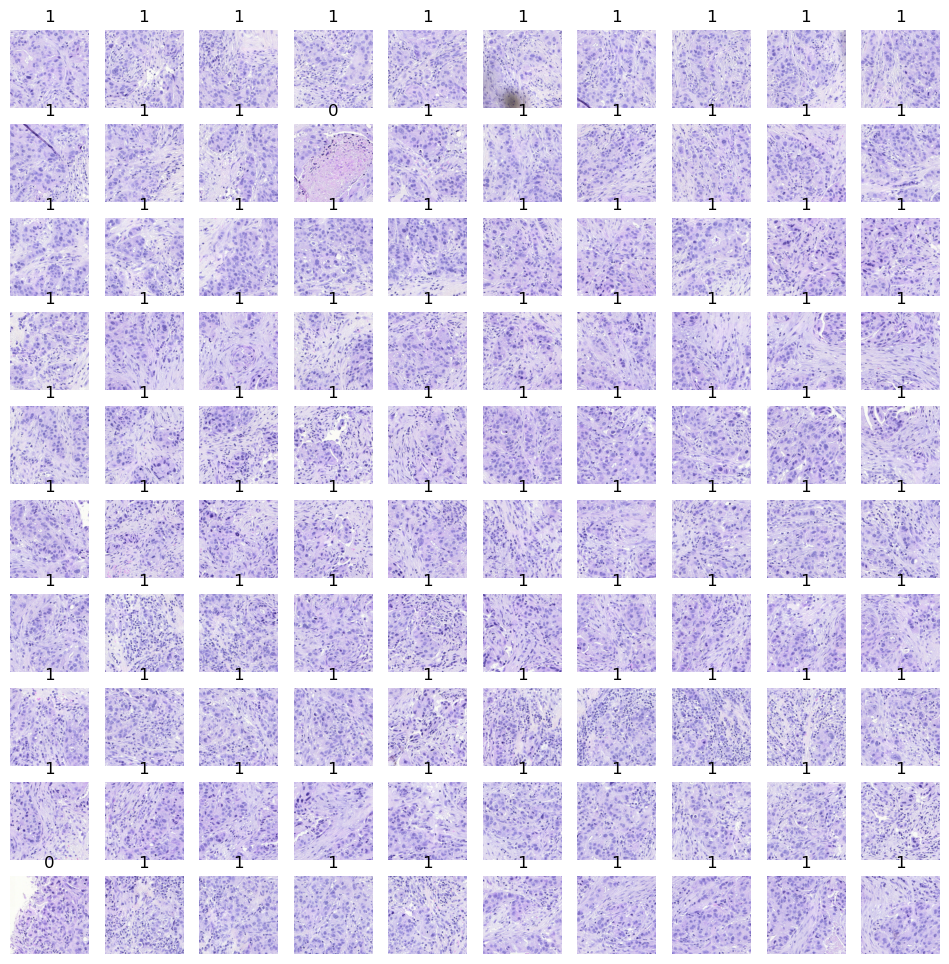

In [30]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
axs = axes.ravel()
for i, ax in enumerate(axs):
    ax.imshow(np.transpose(pt0[i, :, :, :].numpy(), (1, 2, 0)))
    ax.set_title(L[i].numpy())
    ax.axis('off')

In [6]:
mask_file = '/Volumes/AlexS/MastersData/QupathLabels/export10x/TCGA-A8-A094-01Z-00-DX1.6750B72A-FEC7-49FA-8520-FCF101CA59AC.png'
mask = np.array(Image.open(mask_file))

In [7]:
mask_patches = image_to_patches(mask, 299, 299)

In [8]:
slide = open_slide('/Volumes/AlexS/MastersData/SVS files/TCGA-A8-A094-01Z-00-DX1.6750B72A-FEC7-49FA-8520-FCF101CA59AC.svs')
slide_props = slide.properties
slide_width = int(slide_props['openslide.level[1].width']); slide_height = int(slide_props['openslide.level[1].height'])
sld = np.array(slide.get_thumbnail(size=(slide_width, slide_height)))

In [9]:
im_patches = image_to_patches(sld, 299, 299)

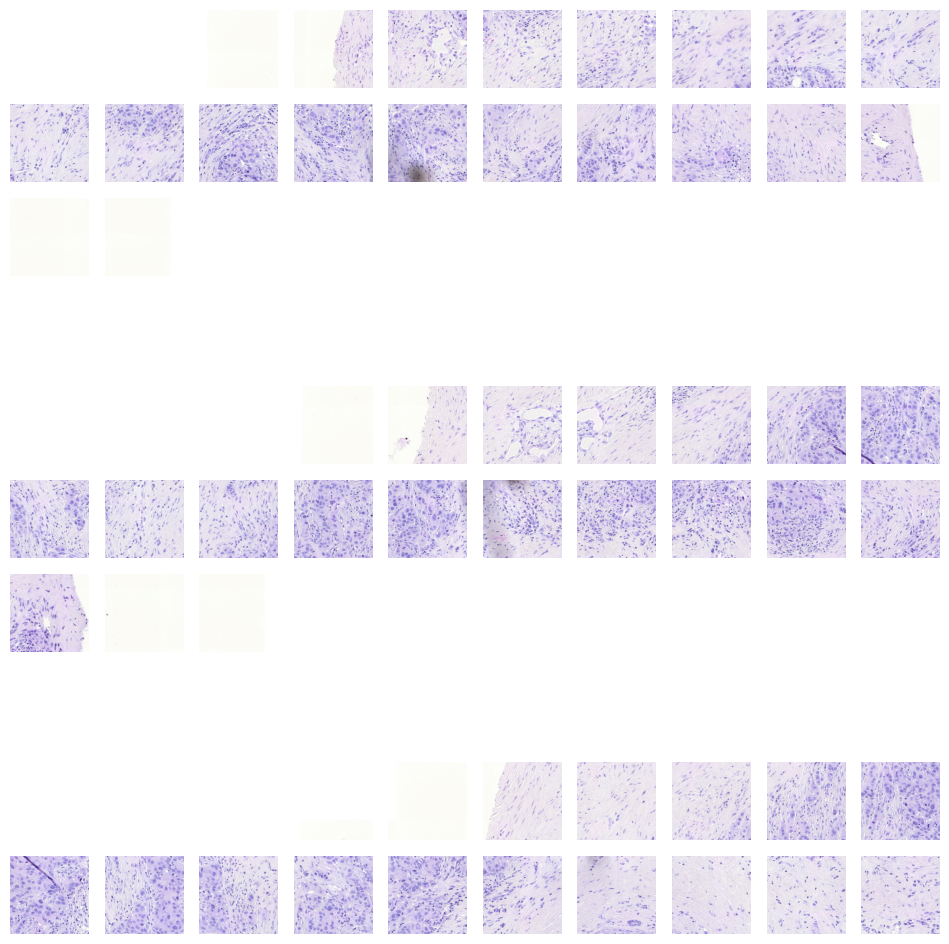

In [17]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
axs = axes.ravel()
for i, ax in enumerate(axs):
    ax.imshow(np.transpose(im_patches[500+i, :, :, :].numpy(), (1, 2, 0)))
    ax.axis('off')

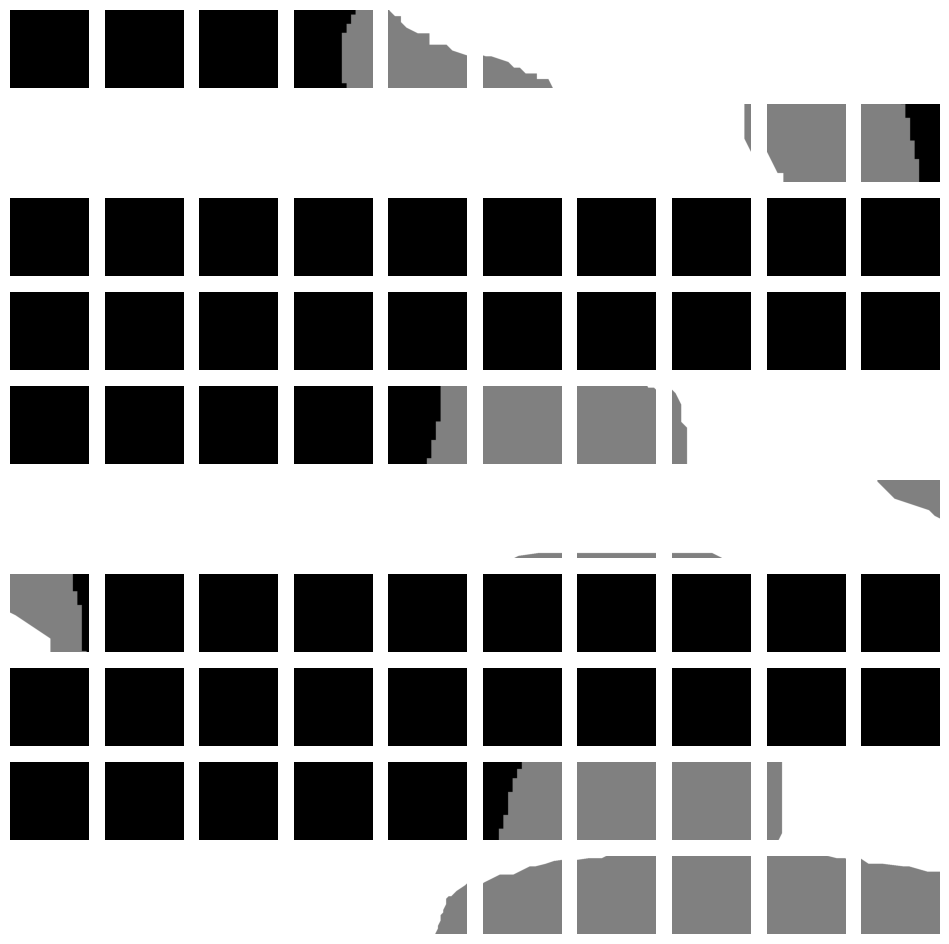

In [18]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
axs = axes.ravel()
for i, ax in enumerate(axs):
    ax.imshow(mask_patches[500+i, :, :].numpy(), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

In [10]:
tissue_patches, seg_patches = discard_background_patches(im_patches, mask_patches, 299)

0/2009
200/2009
400/2009
600/2009
800/2009
1000/2009
1200/2009
1400/2009
1600/2009
1800/2009
2000/2009


In [11]:
print(seg_patches.shape)

torch.Size([655, 299, 299])


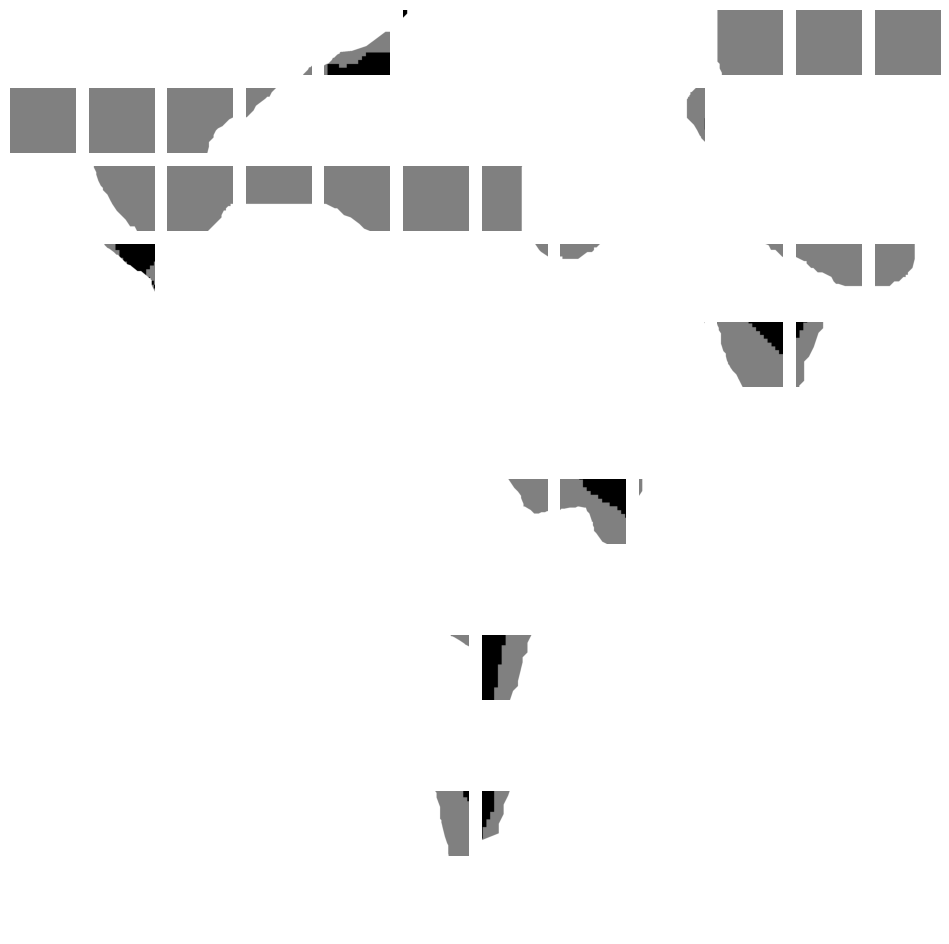

In [13]:
fig, axes = plt.subplots(12, 12, figsize=(12, 12))
axs = axes.ravel()
for i, ax in enumerate(axs):
    ax.imshow(seg_patches[200+i, :, :].numpy(), cmap="gray", vmin=0, vmax=1)
    # ax.set_title(L[i].numpy())
    ax.axis('off')

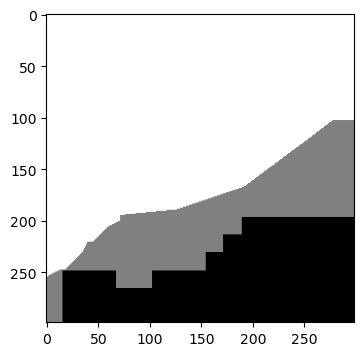

In [36]:
# View patch
plt.figure(figsize=(4, 4))
plt.imshow(seg_patches[204, :, :].numpy(), cmap="gray", vmin=0, vmax=1)

In [37]:
p = seg_patches[246, :, :].numpy()
nwhite_px = np.sum(p == 1); ngrey_px = np.sum(p == 0.5)
# Calculate % of background (black) pixels
# background_percentage = nblack_px/total_px
tissue_percentage = (ngrey_px + nwhite_px)/(299*299)

In [38]:
print(nwhite_px/(299*299))

0.5052180624377803


### check new function works correctly

In [5]:
PATCH_DIR='/Volumes/AlexS/MastersData/processed/patches/'
patches = os.listdir(PATCH_DIR)
file = PATCH_DIR + patches[0]

label_path = '/Volumes/AlexS/MastersData/processed/labels/' + patches[0]

NameError: name 'os' is not defined

In [40]:
print(file)
print(label_path)

/Volumes/AlexS/MastersData/processed/patches/TCGA-A8-A09K-01Z-00-DX1.pt
/Volumes/AlexS/MastersData/processed/labels/TCGA-A8-A09K-01Z-00-DX1.pt


In [41]:
patches = torch.load(file)

In [42]:
print(patches.shape)

torch.Size([1274, 3, 256, 256])


In [43]:
L = torch.load(label_path)

In [44]:
print(L.shape)

torch.Size([1274])


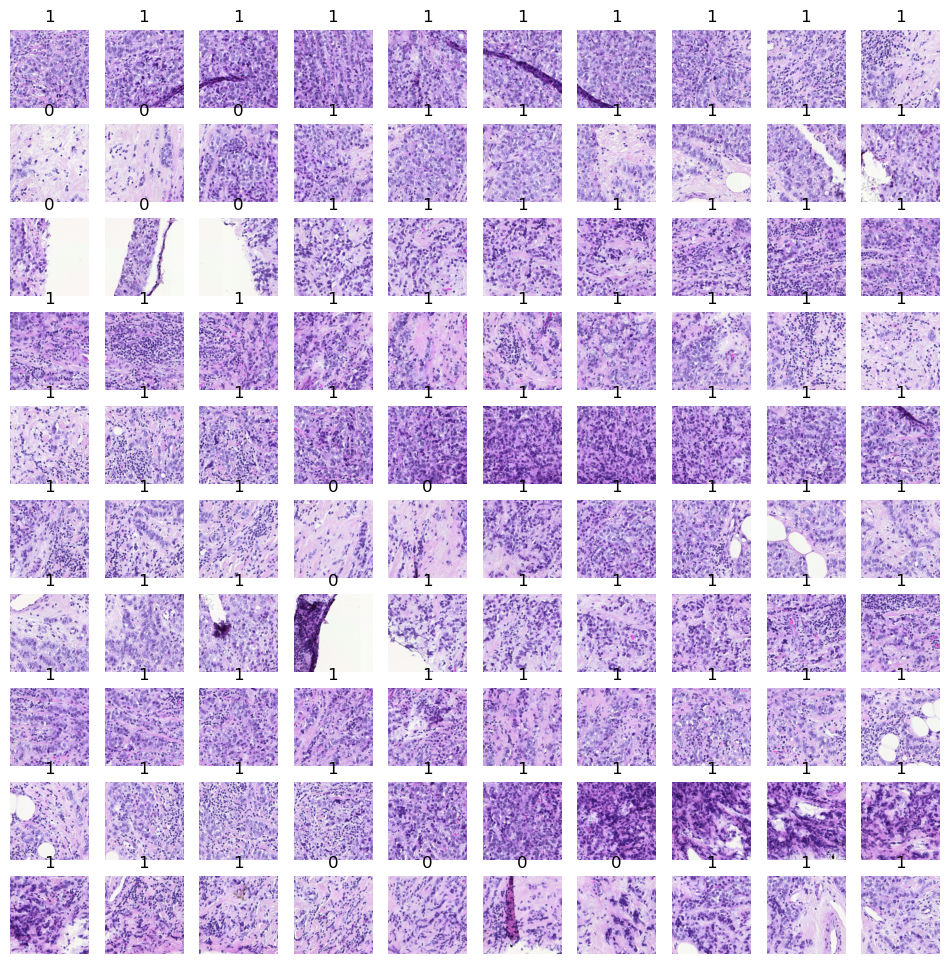

: 

In [79]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
axs = axes.ravel()
for i, ax in enumerate(axs):
    ax.imshow(np.transpose(patches[600+i, :, :, :].numpy(), (1, 2, 0)))
    ax.set_title(L[600+i].numpy())
    ax.axis('off')

In [58]:
mask_file = '/Volumes/AlexS/MastersData/QupathLabels/export10x/TCGA-A8-A09K-01Z-00-DX1.41B2DF5F-C0E1-43BB-BAA5-2946A9EC4650.png'
mask = np.array(Image.open(mask_file))

In [60]:
slide = open_slide('/Volumes/AlexS/MastersData/SVS files/TCGA-A8-A09K-01Z-00-DX1.41B2DF5F-C0E1-43BB-BAA5-2946A9EC4650.svs')
slide_props = slide.properties
slide_width = int(slide_props['openslide.level[1].width']); slide_height = int(slide_props['openslide.level[1].height'])
sld = np.array(slide.get_thumbnail(size=(slide_width, slide_height)))

im_patches = image_to_patches(sld, 256, 256)
mask_patches = image_to_patches(mask, 256, 256)

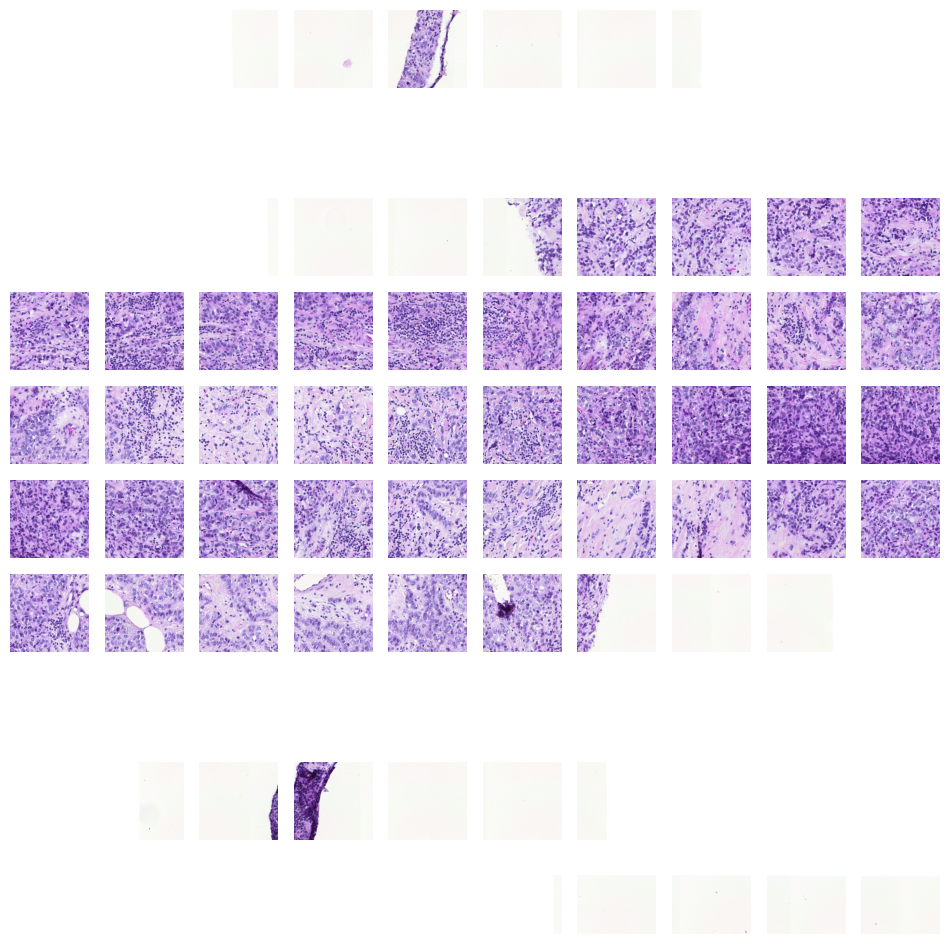

In [77]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
axs = axes.ravel()
for i, ax in enumerate(axs):
    ax.imshow(np.transpose(im_patches[1900+i, :, :, :].numpy(), (1, 2, 0)))
    ax.axis('off')

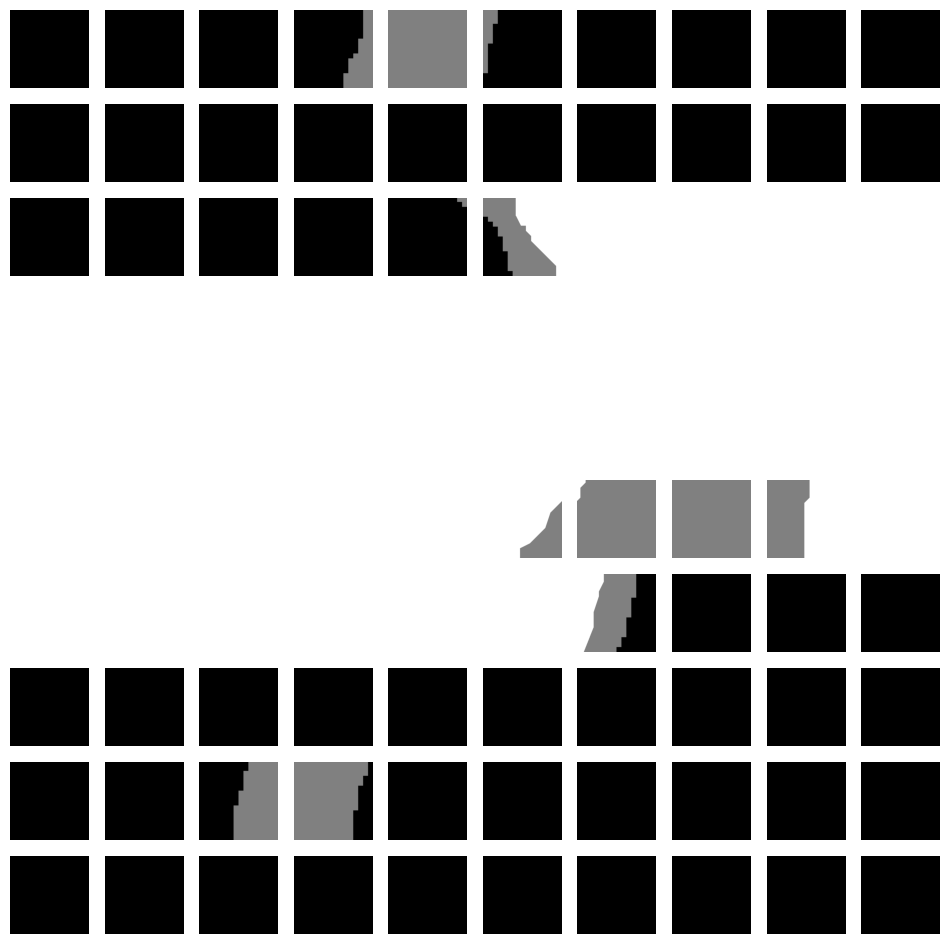

In [78]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
axs = axes.ravel()
for i, ax in enumerate(axs):
    ax.imshow(mask_patches[1900+i, :, :].numpy(), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

In [8]:
PATCH_DIR='/Volumes/AlexS/MastersData/processed/patches/'
case_code = 'TCGA-D8-A1J9-01Z-00-DX1.F81FA9EF-8129-4E17-A9AD-2B850782CC18'
file = PATCH_DIR + case_code.split('.')[0] + '.pt'

In [9]:
import torch

# Load in patch tensor
patches = torch.load(file)

KeyboardInterrupt: 

In [ ]:
print(patches.shape)

torch.Size([6250, 3, 256, 256])


: 

In [10]:
DIR='/Volumes/AlexS/MastersData/processed/patch_indices/'
case = 'TCGA-A1-A0SP-01Z-00-DX1.pt'
file = DIR + case

In [11]:
indices = torch.load(file)

In [12]:
print(len(indices))

5405


In [1]:
import torch
j = torch.load('/Volumes/AlexS/MastersData/processed/patches/A8-A09K/A8-A09K_0.pt')

In [2]:
print(j.shape)

torch.Size([3, 256, 256])


In [5]:
import numpy as np
from PIL import Image
import torch
Image.MAX_IMAGE_PIXELS = None

# m ='/Volumes/AlexS/MastersData/QupathLabels/export10x/TCGA-A2-A0SW-01Z-00-DX1.E1EA0407-B831-4D75-826E-80B82B821797.png'
m = '/Users/alexandrasmith/Desktop/Workspace/Projects/masters/data/interim/masks/TCGA-A2-A0SW-01Z-00-DX1.E1EA0407-B831-4D75-826E-80B82B821797.png'
mask = np.array(Image.open(m))
print(mask.shape)

(21258, 30464)


In [8]:
import pandas as pd

code = 'TCGA-A2-A0SW-01Z-00-DX1.E1EA0407-B831-4D75-826E-80B82B821797'

df = pd.read_excel("/Volumes/AlexS/MastersData/processed/svs_data.xlsx", usecols="B, I, J")
dict = df.set_index('File_name').to_dict('index')
slide_height = dict[code.split('.')[0]]['Level1_height']
slide_width = dict[code.split('.')[0]]['Level1_width']
mask = mask[:slide_height, :slide_width] # reshape mask file to be same size as SVS
h, w = mask.shape
new_width = w - (w % 256); new_height = h - (h % 256)
# crop so that extracting patches doesn't pad the image
cropped_mask = mask[:new_height, :new_width]
# Extract patches for segmentation masks
mask_patches = image_to_patches(cropped_mask, 256, 256)

In [9]:
print(mask_patches.shape)

torch.Size([9794, 256, 256])


In [4]:
mask_patches = image_to_patches(mask, 256, 256)

In [5]:
print(mask_patches.shape)

torch.Size([9877, 256, 256])


In [11]:
# Compute amount of padding needed
h, w = mask.shape
patch_size = 256

new_width = w - (w % 256)
new_height = h - (h % 256)

im_cropped = mask[0:new_height, 0:new_width]

In [14]:
print(im_cropped.shape)

(21248, 30464)


In [15]:
mask_patches1 = image_to_patches(np.array(im_cropped), 256, 256)

In [16]:
print(mask_patches1.shape)

torch.Size([9877, 256, 256])


In [3]:
mm = torch.load('/Volumes/AlexS/MastersData/processed/gt_patches/TCGA-A2-A0SW-01Z-00-DX1.pt')

In [4]:
print(mm.shape)

torch.Size([2485, 256, 256])


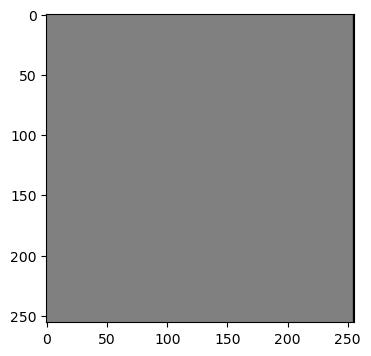

In [16]:
im = mask_patches[9876]
plt.figure(figsize=(4, 4))
plt.imshow(im.numpy(), cmap="gray", vmin=0, vmax=1)

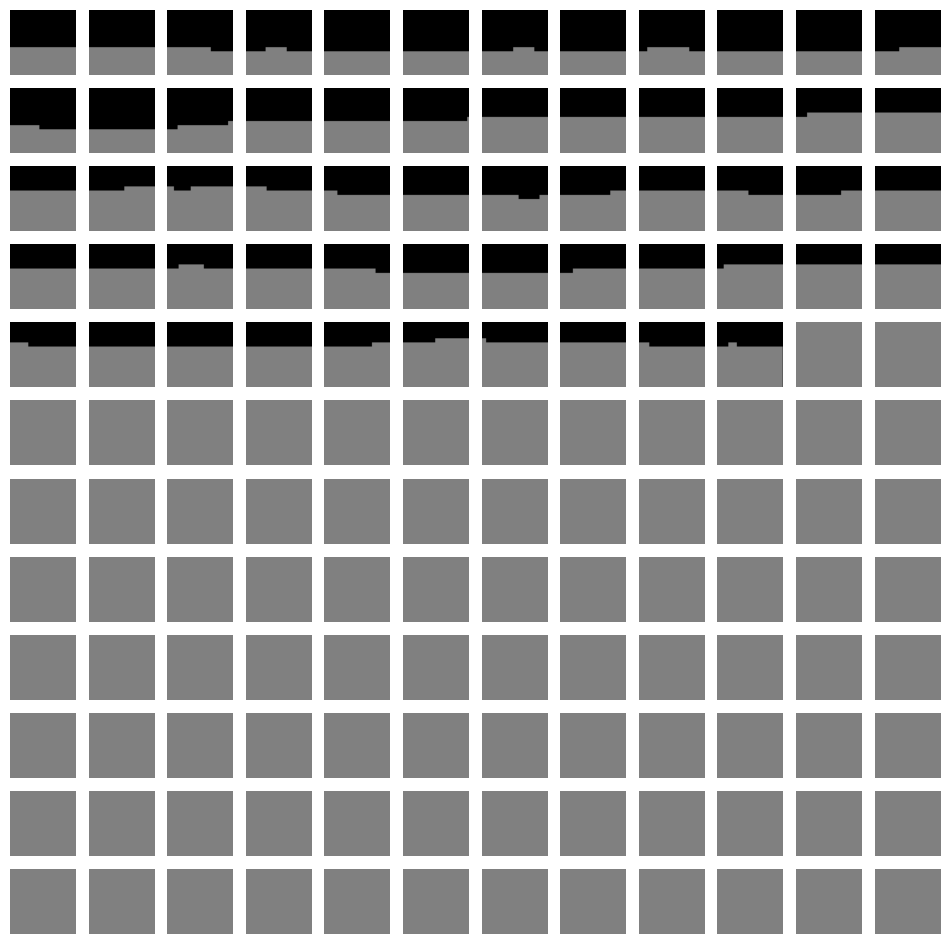

: 

In [19]:
fig, axes = plt.subplots(12, 12, figsize=(12, 12))
axs = axes.ravel()
for i, ax in enumerate(axs):
    ax.imshow(mask_patches[9700+i, :, :].numpy(), cmap="gray", vmin=0, vmax=1)
    # ax.set_title(L[i].numpy())
    ax.axis('off')

In [15]:
mask_patches[9794]

tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        ...,
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]])

In [17]:
s ='/Volumes/AlexS/MastersData/SVS files/TCGA-A2-A0SW-01Z-00-DX1.E1EA0407-B831-4D75-826E-80B82B821797.svs'
sld = open_slide(s)
slide_props = sld.properties
slide_width = int(slide_props['openslide.level[1].width']); slide_height = int(slide_props['openslide.level[1].height']) # dimensions at 10X magnification
slide = np.array(sld.get_thumbnail(size=(slide_width, slide_height)))
print(slide.shape)

(21258, 30463, 3)


In [18]:
slide_patches = image_to_patches(slide, 256, 256)

In [20]:
print(slide_patches.shape)

torch.Size([9794, 3, 256, 256])


In [1]:
import pandas as pd
col_names = ['File_name', 'Level0_factor', 'Level1_factor', 'Level2_factor', 'Level3_factor', 'Level0_height', 'Level0_width',
                'Level1_height', 'Level1_width', 'Level2_height', 'Level2_width', 'Level3_height', 'Level3_width']
df = pd.DataFrame(columns=col_names).to_csv('/Volumes/AlexS/MastersData/processed/info_01.csv')

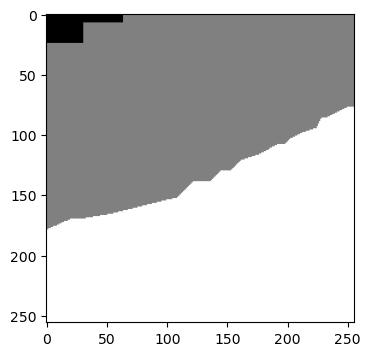

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

t = torch.load('/Volumes/AlexS/MastersData/processed/gt_patches/TCGA-AC-A23C-01Z-00-DX1.pt')
patch0 = t[0]
plt.figure(figsize=(4, 4))
plt.imshow(patch0.numpy(), cmap="gray", vmin=0, vmax=1)